In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset to examine its structure
file_path = './data/fatal-police-shootings-data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and columns
data.head()


,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


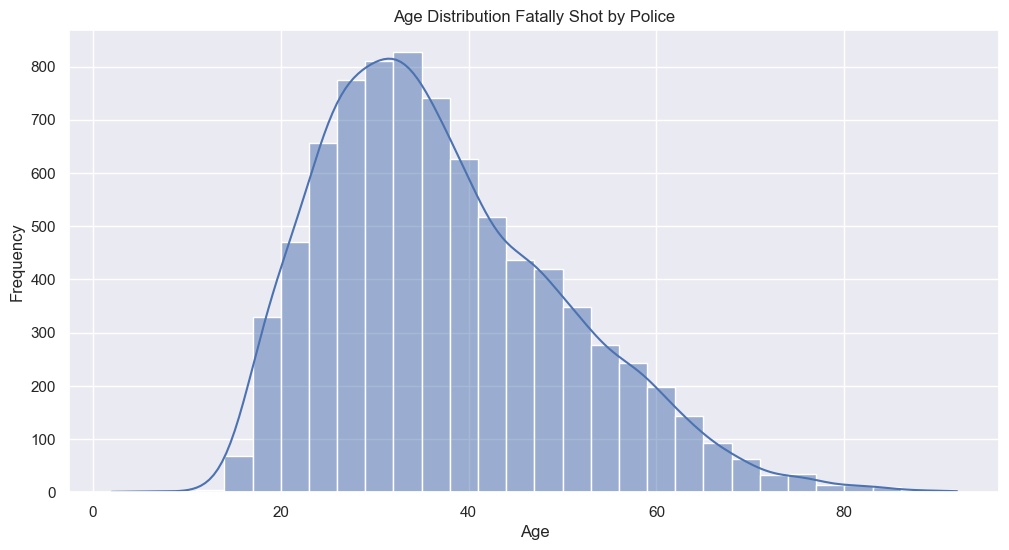

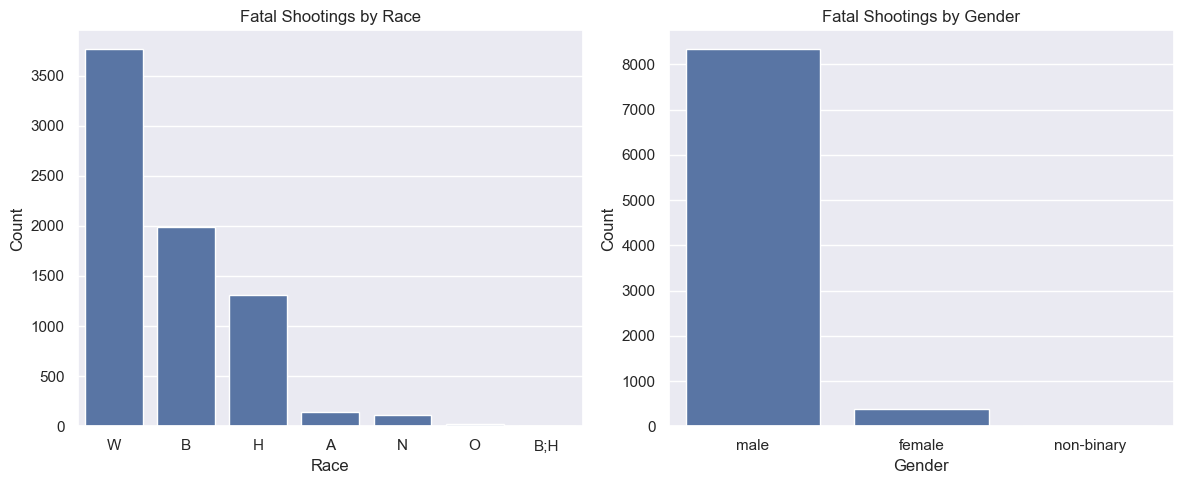

,latitude,longitude
latitude,1.000000,0.008771
longitude,0.008771,1.000000


In [3]:

# Setting up the aesthetics for plots
sns.set(style="darkgrid")

# Statistical Analysis

# 1. Age Distribution of Individuals Fatally Shot by Police
plt.figure(figsize=(12, 6))
sns.histplot(data['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution Fatally Shot by Police')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Variation of Fatal Police Shootings by Race and Gender
race_counts = data['race'].value_counts()
gender_counts = data['gender'].value_counts()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=race_counts.index, y=race_counts.values)
plt.title('Fatal Shootings by Race')
plt.xlabel('Race')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Fatal Shootings by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# 3. Correlation between Geographic Location and Incident Frequency/Nature
# Calculating correlation coefficients for latitude, longitude, and frequency of incidents
correlation_matrix = data[['latitude', 'longitude']].corr()

correlation_matrix



In [4]:
shootings_data= data
# Check for missing values in 'state', 'latitude', and 'longitude'
missing_values = shootings_data[['state', 'latitude', 'longitude']].isnull().sum()

# Count the number of shootings per state
shootings_by_state = shootings_data['state'].value_counts()

missing_values, shootings_by_state.head()


(state          0
 latitude     988
 longitude    988
 dtype: int64,
 state
 CA    1235
 TX     807
 FL     559
 AZ     397
 GA     336
 Name: count, dtype: int64)

In [5]:
import folium

# Filter out entries with missing latitude or longitude
complete_geo_data = shootings_data.dropna(subset=['latitude', 'longitude'])

# Create a base map
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Add a circle marker for each shooting
for idx, row in complete_geo_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=1, # Small fixed radius for individual events
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# Save the map to an HTML file
map_file_path = 'map.html'
m.save(map_file_path)

map_file_path


'map.html'

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


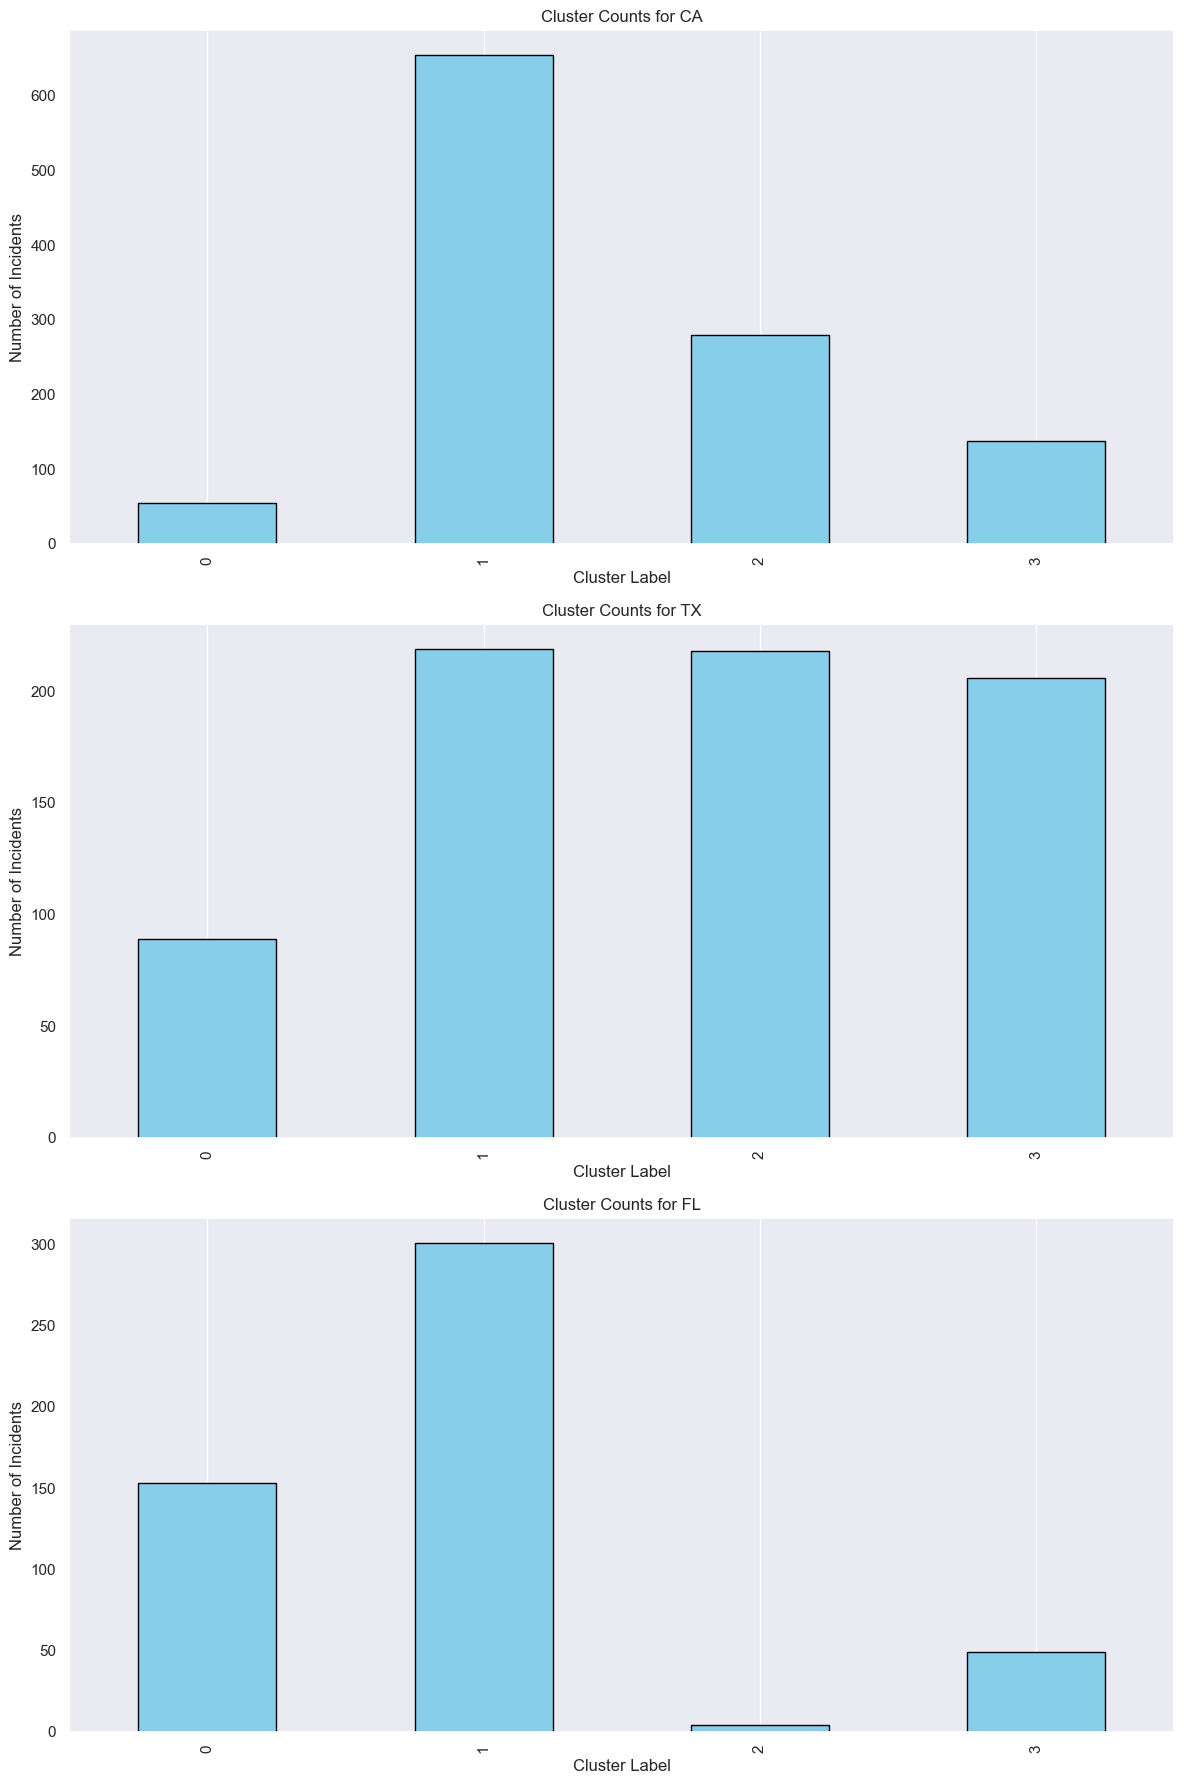

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Filter data for CA, TX, and FL
filtered_data = data[data['state'].isin(['CA', 'TX', 'FL'])]

# Define the list of states
states = ['CA', 'TX', 'FL']

# Count the number of incidents in each cluster for each state
cluster_counts = []

for state in states:
    state_data = filtered_data[filtered_data['state'] == state]
    state_coordinates = state_data[['latitude', 'longitude']].dropna()
    
    # Apply K-Means clustering for each state
    kmeans_state = KMeans(n_clusters=4, random_state=0).fit(state_coordinates)
    state_labels = kmeans_state.labels_
    
    cluster_counts.append(pd.Series(state_labels).value_counts())

# Visualize the cluster counts for each state
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, (state, counts) in enumerate(zip(states, cluster_counts)):
    counts.sort_index().plot(kind='bar', ax=axs[i], color='skyblue', edgecolor='black')
    axs[i].set_title(f'Cluster Counts for {state}')
    axs[i].set_xlabel('Cluster Label')
    axs[i].set_ylabel('Number of Incidents')
    axs[i].grid(axis='y')

plt.tight_layout()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


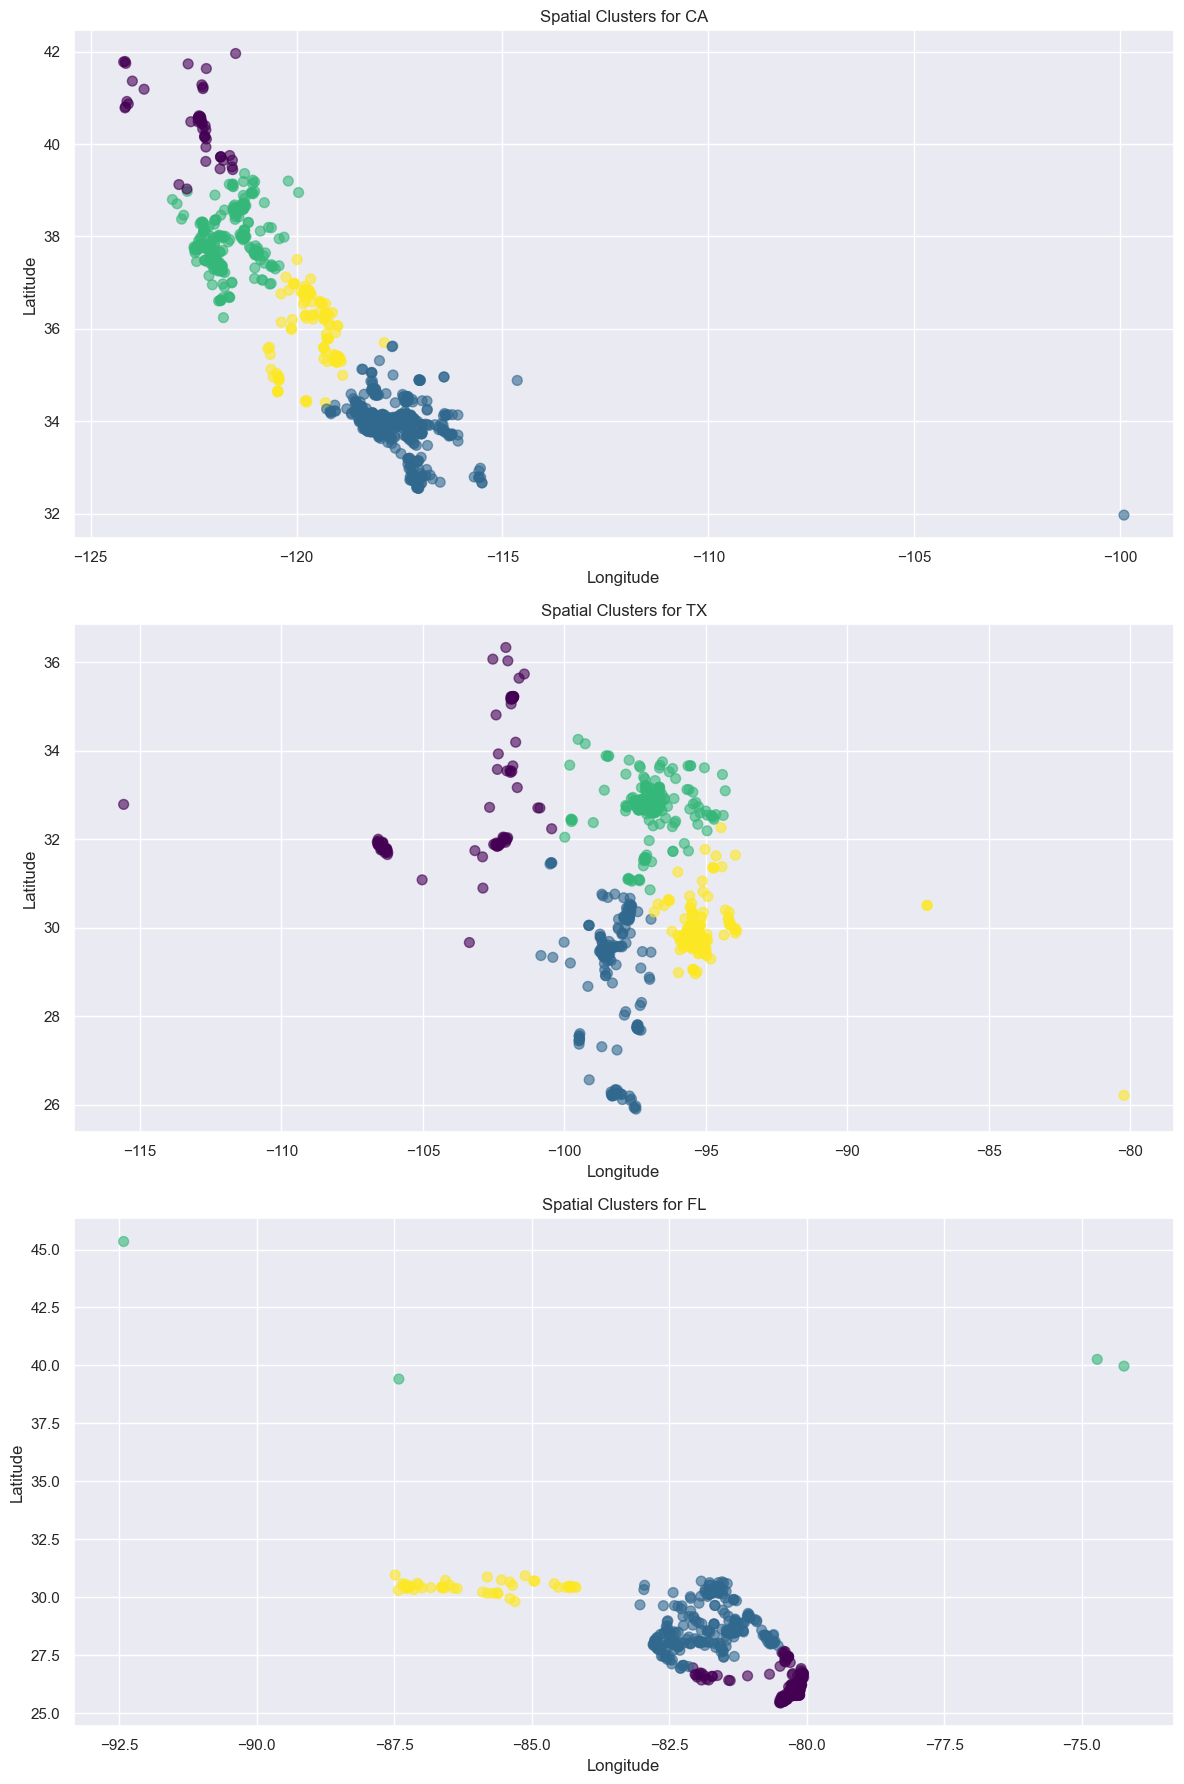

{'CA': 1    655
 2    280
 3    138
 0     54
 Name: count, dtype: int64,
 'TX': 1    219
 2    218
 3    206
 0     89
 Name: count, dtype: int64,
 'FL': 1    301
 0    153
 3     49
 2      4
 Name: count, dtype: int64}

In [7]:
# Performing K-Means clustering separately for each state and visualizing the results
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
cluster_counts_states = {}

for i, state in enumerate(states):
    state_data = filtered_data[filtered_data['state'] == state]
    state_coordinates = state_data[['latitude', 'longitude']].dropna()
    
    # Applying K-Means clustering for each state
    kmeans_state = KMeans(n_clusters=4, random_state=0).fit(state_coordinates)
    state_labels = kmeans_state.labels_
    
    axs[i].scatter(state_coordinates['longitude'], state_coordinates['latitude'], c=state_labels, cmap='viridis', s=50, alpha=0.6)
    axs[i].set_title(f'Spatial Clusters for {state}')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].grid(True)
    
    # Storing the cluster counts for each state
    cluster_counts_states[state] = pd.Series(state_labels).value_counts()

plt.tight_layout()
plt.show()

cluster_counts_states


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


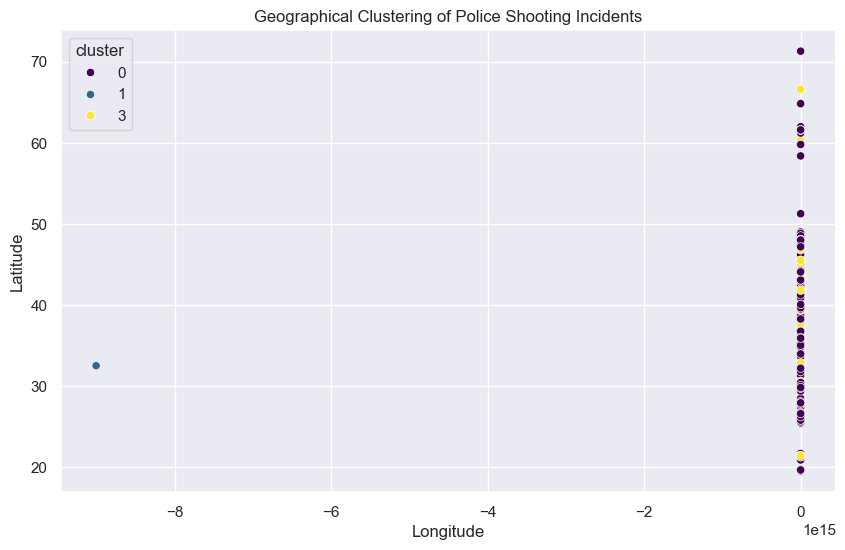

In [9]:
# Focus on geographical data for clustering
geo_data = data[['latitude', 'longitude']].dropna()

# Using KMeans for clustering - starting with an arbitrary choice of 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(geo_data)
geo_data['cluster'] = kmeans.labels_

# Plotting the geographical clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=geo_data, palette='viridis')
plt.title('Geographical Clustering of Police Shooting Incidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer


In [12]:
# Selecting relevant columns for clustering based on circumstances
circumstances_data = data[['threat_type', 'flee_status', 'armed_with', 'was_mental_illness_related']]

# Handling categorical data and missing values
circumstances_data = circumstances_data.fillna('Unknown')  # Replace missing values with 'Unknown'
label_encoders = {column: LabelEncoder().fit(circumstances_data[column]) for column in circumstances_data}
for column, encoder in label_encoders.items():
    circumstances_data[column] = encoder.transform(circumstances_data[column])

# Clustering (using KMeans again with 5 clusters as a starting point)
kmeans_circumstances = KMeans(n_clusters=5, random_state=0).fit(circumstances_data)
circumstances_data['cluster'] = kmeans_circumstances.labels_

# Count of incidents in each cluster
cluster_counts = circumstances_data['cluster'].value_counts()
cluster_counts

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
0    5440
2     965
3     885
4     744
1     734
Name: count, dtype: int64

In [13]:
# Reversing the label encoding to interpret the clusters
for column, encoder in label_encoders.items():
    circumstances_data[column] = encoder.inverse_transform(circumstances_data[column])

# Grouping the data by cluster and examining the common characteristics
cluster_characteristics = circumstances_data.groupby('cluster').agg(lambda x: x.value_counts().index[0])
cluster_characteristics


,threat_type,flee_status,armed_with,was_mental_illness_related
cluster,,,,
0,shoot,not,gun,False
1,threat,not,replica,False
2,threat,not,knife,False
3,attack,car,unarmed,False
4,attack,not,knife,False


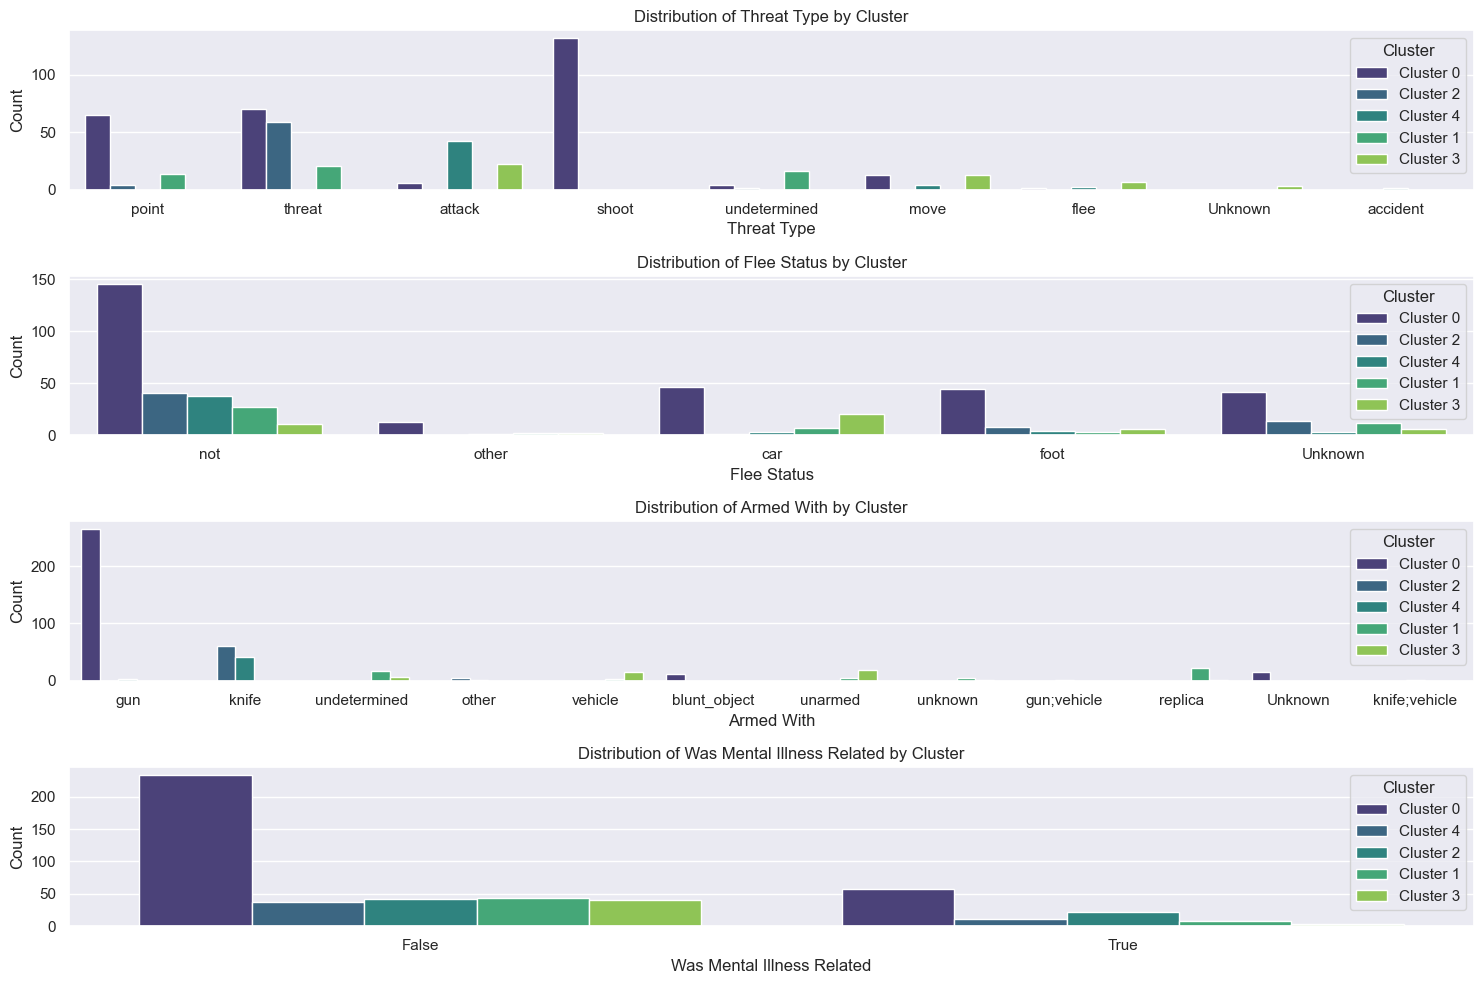

In [20]:

# Preparing data for plotting
plot_data = circumstances_data.copy()
plot_data['cluster'] = 'Cluster ' + plot_data['cluster'].astype(str)

# Plotting the categorical data - we use a small subset for clarity
sampled_data = plot_data.sample(n=500, random_state=0)  # Sampling for clarity in visualization

# Plotting each category
fig, axes = plt.subplots(4,1,figsize=(15, 10))
categories = ['threat_type', 'flee_status', 'armed_with', 'was_mental_illness_related']
for ax, category in zip(axes.flatten(), categories):
    sns.countplot(x=category, hue='cluster', data=sampled_data, ax=ax, palette='viridis')
    ax.set_title(f'Distribution of {category.replace("_", " ").title()} by Cluster')
    ax.set_xlabel(category.replace("_", " ").title())
    ax.set_ylabel('Count')
    ax.legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Preprocessing the data for the "Type of Weapon" prediction model

# Creating a binary variable for weapon type: 1 for 'gun', 0 for 'non-gun'
data['weapon_binary'] = (data['armed_with'] == 'gun').astype(int)

# Selecting a subset of features for the model
features_weapon = data[['age', 'gender', 'race', 'was_mental_illness_related', 'weapon_binary']]

# Handling missing values and encoding categorical variables
features_weapon = features_weapon.dropna()
features_weapon['gender'] = LabelEncoder().fit_transform(features_weapon['gender'])
features_weapon['race'] = LabelEncoder().fit_transform(features_weapon['race'])
features_weapon['was_mental_illness_related'] = features_weapon['was_mental_illness_related'].astype(int)

# Splitting the data into training and testing sets
X = features_weapon.drop('weapon_binary', axis=1)
y = features_weapon['weapon_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the logistic regression model for weapon prediction
model_weapon = LogisticRegression()
model_weapon.fit(X_train, y_train)

# Evaluating the model
predictions_weapon = model_weapon.predict(X_test)
report_weapon = classification_report(y_test, predictions_weapon)

# Output the classification report for the weapon prediction model
report_weapon


'              precision    recall  f1-score   support\n\n           0       0.60      0.18      0.28       917\n           1       0.60      0.91      0.72      1239\n\n    accuracy                           0.60      2156\n   macro avg       0.60      0.55      0.50      2156\nweighted avg       0.60      0.60      0.53      2156\n'

In [22]:
# Preprocessing the data for the "Mental Illness Involvement" prediction model

# Selecting a subset of features for the model
features_mental_illness = data[['age', 'gender', 'race', 'weapon_binary', 'was_mental_illness_related']]

# Handling missing values and encoding categorical variables
features_mental_illness = features_mental_illness.dropna()
features_mental_illness['gender'] = LabelEncoder().fit_transform(features_mental_illness['gender'])
features_mental_illness['race'] = LabelEncoder().fit_transform(features_mental_illness['race'])
features_mental_illness['was_mental_illness_related'] = features_mental_illness['was_mental_illness_related'].astype(int)

# Splitting the data into training and testing sets
X_mental = features_mental_illness.drop('was_mental_illness_related', axis=1)
y_mental = features_mental_illness['was_mental_illness_related']
X_train_mental, X_test_mental, y_train_mental, y_test_mental = train_test_split(X_mental, y_mental, test_size=0.3, random_state=42)

# Training the logistic regression model for mental illness involvement prediction
model_mental_illness = LogisticRegression()
model_mental_illness.fit(X_train_mental, y_train_mental)

# Evaluating the model
predictions_mental_illness = model_mental_illness.predict(X_test_mental)
report_mental_illness = classification_report(y_test_mental, predictions_mental_illness)

# Output the classification report for the mental illness involvement prediction model
report_mental_illness


'              precision    recall  f1-score   support\n\n           0       0.80      1.00      0.89      1723\n           1       0.80      0.01      0.02       433\n\n    accuracy                           0.80      2156\n   macro avg       0.80      0.50      0.45      2156\nweighted avg       0.80      0.80      0.71      2156\n'

In [23]:
# Preprocessing the data for the "Body Camera Presence" prediction model

# Selecting a subset of features for the model
features_body_camera = data[['age', 'gender', 'race', 'weapon_binary', 'was_mental_illness_related', 'body_camera']]

# Handling missing values and encoding categorical variables
features_body_camera = features_body_camera.dropna()
features_body_camera['gender'] = LabelEncoder().fit_transform(features_body_camera['gender'])
features_body_camera['race'] = LabelEncoder().fit_transform(features_body_camera['race'])
features_body_camera['was_mental_illness_related'] = features_body_camera['was_mental_illness_related'].astype(int)
features_body_camera['body_camera'] = features_body_camera['body_camera'].astype(int)

# Splitting the data into training and testing sets
X_camera = features_body_camera.drop('body_camera', axis=1)
y_camera = features_body_camera['body_camera']
X_train_camera, X_test_camera, y_train_camera, y_test_camera = train_test_split(X_camera, y_camera, test_size=0.3, random_state=42)

# Training the logistic regression model for body camera presence prediction
model_body_camera = LogisticRegression()
model_body_camera.fit(X_train_camera, y_train_camera)

# Evaluating the model
predictions_body_camera = model_body_camera.predict(X_test_camera)
report_body_camera = classification_report(y_test_camera, predictions_body_camera)

# Output the classification report for the body camera presence prediction model
report_body_camera


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.92      1819\n           1       0.00      0.00      0.00       337\n\n    accuracy                           0.84      2156\n   macro avg       0.42      0.50      0.46      2156\nweighted avg       0.71      0.84      0.77      2156\n'

In [24]:
# Preprocessing the data for the "Prediction of Threat Type" model

# Assuming 'threat_type' is a binary variable (e.g., aggressive vs. non-aggressive)
# If it's not binary, we will need to binarize it for logistic regression
# Here, I'll assume 'point' represents a more aggressive threat, and others as non-aggressive
data['threat_type_binary'] = (data['threat_type'] == 'point').astype(int)

# Selecting a subset of features for the model
features_threat = data[['age', 'gender', 'race', 'weapon_binary', 'was_mental_illness_related', 'threat_type_binary']]
features_threat = features_threat.dropna()
features_threat['gender'] = LabelEncoder().fit_transform(features_threat['gender'])
features_threat['race'] = LabelEncoder().fit_transform(features_threat['race'])
features_threat['was_mental_illness_related'] = features_threat['was_mental_illness_related'].astype(int)

# Splitting the data into training and testing sets
X_threat = features_threat.drop('threat_type_binary', axis=1)
y_threat = features_threat['threat_type_binary']
X_train_threat, X_test_threat, y_train_threat, y_test_threat = train_test_split(X_threat, y_threat, test_size=0.3, random_state=42)

# Training the logistic regression model for threat type prediction
model_threat_type = LogisticRegression()
model_threat_type.fit(X_train_threat, y_train_threat)

# Evaluating the model
predictions_threat_type = model_threat_type.predict(X_test_threat)
report_threat_type = classification_report(y_test_threat, predictions_threat_type)

# Output the classification report for the threat type prediction model
report_threat_type


'              precision    recall  f1-score   support\n\n           0       0.81      1.00      0.90      1757\n           1       0.00      0.00      0.00       399\n\n    accuracy                           0.81      2156\n   macro avg       0.41      0.50      0.45      2156\nweighted avg       0.66      0.81      0.73      2156\n'